# Solar Power Forecasting - Pipeline v2

Predicting DC power output from solar panels using weather data.

## Contents
1. Data Loading
2. Exploratory Data Analysis
3. Data Merging
4. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

## 1. Data Loading

In [2]:
# Load Plant 1 data
gen1 = pd.read_csv('../data/Plant_1_Generation_Data.csv')
weather1 = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')

print(f"Generation Data: {gen1.shape}")
print(f"Weather Data: {weather1.shape}")

Generation Data: (68778, 7)
Weather Data: (3182, 6)


In [3]:
gen1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
weather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


## 2. Exploratory Data Analysis

In [5]:
print("=== Generation Data Info ===")
gen1.info()

=== Generation Data Info ===
<class 'pandas.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  str    
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  str    
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), str(2)
memory usage: 3.7 MB


In [6]:
print("=== Weather Data Info ===")
weather1.info()

=== Weather Data Info ===
<class 'pandas.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   str    
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   str    
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), str(2)
memory usage: 149.3 KB


In [7]:
# Check unique inverters (SOURCE_KEY)
print(f"Number of inverters: {gen1['SOURCE_KEY'].nunique()}")
print(f"\nInverter IDs:\n{gen1['SOURCE_KEY'].unique()}")

Number of inverters: 22

Inverter IDs:
<StringArray>
['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD', '7JYdWkrLSPkdwr4',
 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU', 'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE',
 'ZoEaEvLYb1n2sOq', 'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
 'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV', 'sjndEbLyjtCKgGv',
 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2', 'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY',
 'zVJPv84UY57bAof', 'YxYtjZvoooNbGkE']
Length: 22, dtype: str


In [8]:
# Basic statistics - Generation
gen1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [9]:
# Basic statistics - Weather
weather1.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [10]:
# Missing values
print("=== Missing Values ===")
print("\nGeneration:")
print(gen1.isnull().sum())
print("\nWeather:")
print(weather1.isnull().sum())

=== Missing Values ===

Generation:
DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

Weather:
DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [11]:
# Convert datetime
gen1['DATE_TIME'] = pd.to_datetime(gen1['DATE_TIME'], dayfirst=True)
weather1['DATE_TIME'] = pd.to_datetime(weather1['DATE_TIME'])

print(f"Generation: {gen1['DATE_TIME'].min()} ~ {gen1['DATE_TIME'].max()}")
print(f"Weather: {weather1['DATE_TIME'].min()} ~ {weather1['DATE_TIME'].max()}")

Generation: 2020-05-15 00:00:00 ~ 2020-06-17 23:45:00
Weather: 2020-05-15 00:00:00 ~ 2020-06-17 23:45:00


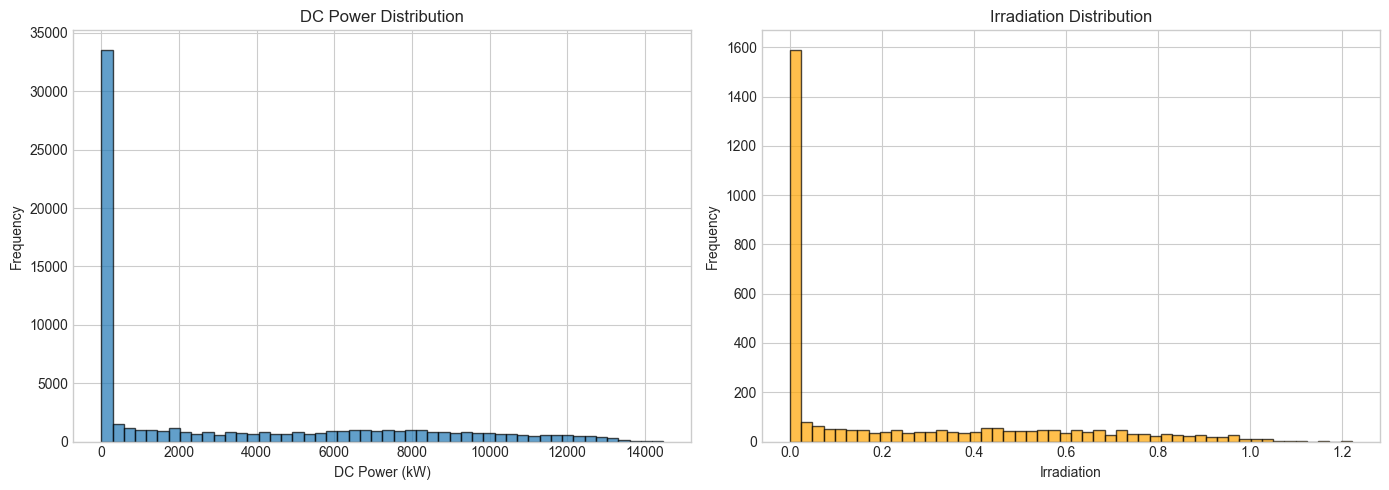

In [12]:
# Visualize DC Power distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(gen1['DC_POWER'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('DC Power (kW)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('DC Power Distribution')

axes[1].hist(weather1['IRRADIATION'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Irradiation')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Irradiation Distribution')

plt.tight_layout()
plt.show()

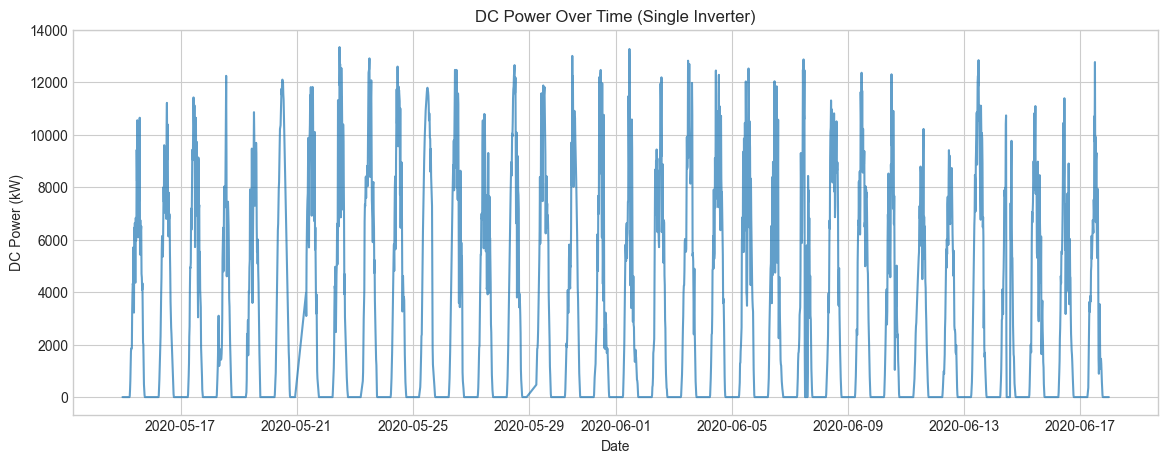

In [13]:
# Time series plot - single inverter
single_inverter = gen1[gen1['SOURCE_KEY'] == gen1['SOURCE_KEY'].unique()[0]]

plt.figure(figsize=(14, 5))
plt.plot(single_inverter['DATE_TIME'], single_inverter['DC_POWER'], alpha=0.7)
plt.xlabel('Date')
plt.ylabel('DC Power (kW)')
plt.title('DC Power Over Time (Single Inverter)')
plt.show()

## 3. Data Merging

Strategy:
- Generation data has multiple rows per timestamp (one per inverter)
- Weather data has one row per timestamp
- We need to aggregate generation data by timestamp, then merge with weather

In [14]:
# Check: rows per timestamp in generation data
print(f"Rows per timestamp: {gen1.groupby('DATE_TIME').size().unique()}")

Rows per timestamp: [21 22 14 20 18 16 10  4 19]


In [15]:
# Aggregate generation data by timestamp
# Sum DC_POWER across all inverters for total plant output
gen1_agg = gen1.groupby('DATE_TIME').agg({
    'DC_POWER': 'sum',
    'AC_POWER': 'sum',
    'DAILY_YIELD': 'sum'
}).reset_index()

print(f"Before aggregation: {gen1.shape}")
print(f"After aggregation: {gen1_agg.shape}")
gen1_agg.head()

Before aggregation: (68778, 7)
After aggregation: (3158, 4)


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD
0,2020-05-15 00:00:00,0.0,0.0,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.0


In [16]:
# Merge generation + weather
df = pd.merge(
    gen1_agg, 
    weather1[['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']], 
    on='DATE_TIME', 
    how='inner'
)

print(f"Merged dataset: {df.shape}")
df.head()

Merged dataset: (3157, 7)


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.0,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.0,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.0,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.0,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.0,24.621525,22.165423,0.0


In [17]:
# Verify merge
print(f"Date range: {df['DATE_TIME'].min()} ~ {df['DATE_TIME'].max()}")
print(f"Total samples: {len(df)}")
print(f"Missing values: {df.isnull().sum().sum()}")

Date range: 2020-05-15 00:00:00 ~ 2020-06-17 23:45:00
Total samples: 3157
Missing values: 0


## 4. Data Preprocessing

In [18]:
# Check for anomalies
print("=== Value Ranges ===")
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        print(f"{col}: [{df[col].min():.2f}, {df[col].max():.2f}]")

=== Value Ranges ===
DC_POWER: [0.00, 298937.79]
AC_POWER: [0.00, 29150.21]
DAILY_YIELD: [0.00, 193770.00]
AMBIENT_TEMPERATURE: [20.40, 35.25]
MODULE_TEMPERATURE: [18.14, 65.55]
IRRADIATION: [0.00, 1.22]


In [19]:
# Check negative values
print(f"Negative DC_POWER: {(df['DC_POWER'] < 0).sum()}")
print(f"Negative IRRADIATION: {(df['IRRADIATION'] < 0).sum()}")

Negative DC_POWER: 0
Negative IRRADIATION: 0


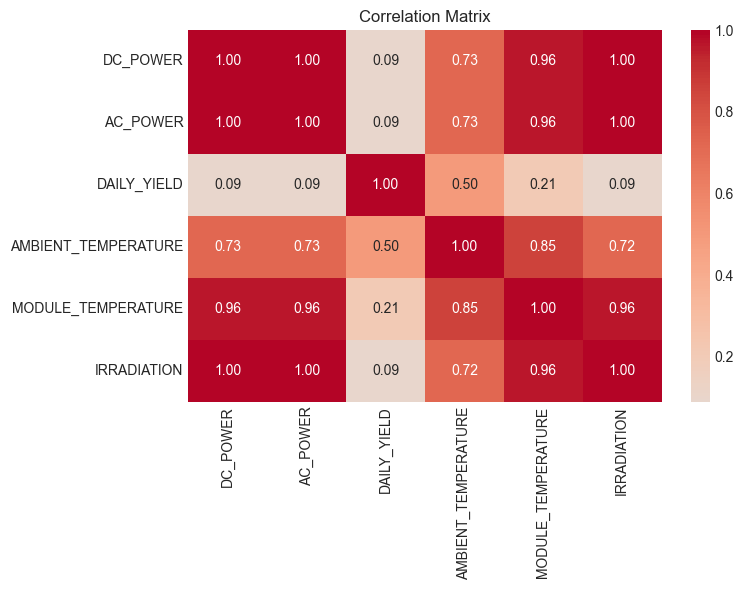

In [20]:
# Correlation matrix
plt.figure(figsize=(8, 6))
corr = df.drop('DATE_TIME', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

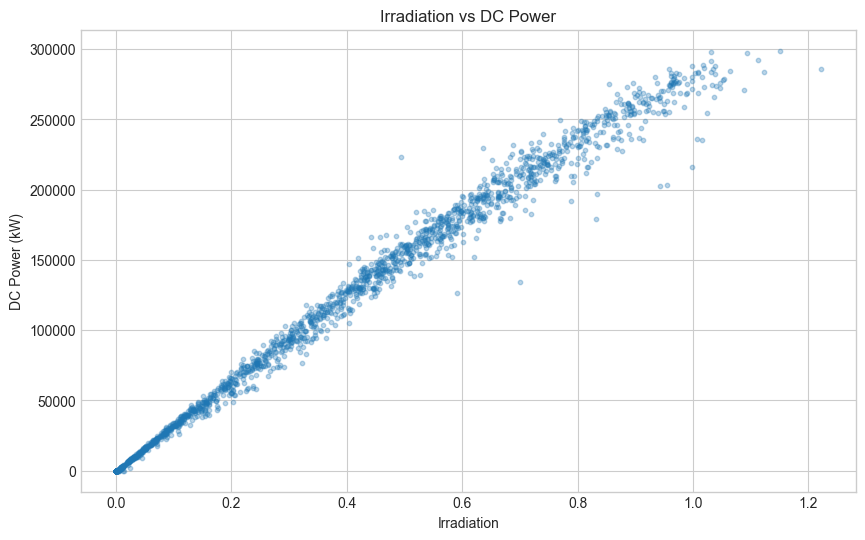

In [21]:
# Scatter: Irradiation vs DC Power
plt.figure(figsize=(10, 6))
plt.scatter(df['IRRADIATION'], df['DC_POWER'], alpha=0.3, s=10)
plt.xlabel('Irradiation')
plt.ylabel('DC Power (kW)')
plt.title('Irradiation vs DC Power')
plt.show()

In [22]:
# Final dataset info
print("=== Final Dataset ===")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

=== Final Dataset ===
Shape: (3157, 7)

Columns: ['DATE_TIME', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

Data types:
DATE_TIME              datetime64[us]
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object


In [23]:
df.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3157,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000
mean,2020-06-01 06:41:41.298701,68560.019625,6704.830534,71798.457968,25.560257,31.175453,0.230103
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,20.398505,18.140415,0.000000
25%,2020-05-23 23:15:00,0.000000,0.000000,90.732143,22.739895,21.130249,0.000000
50%,2020-06-01 12:30:00,8430.196429,814.880357,66068.000000,24.680324,24.801971,0.027748
75%,2020-06-09 18:00:00,140409.892856,13752.112500,129444.625000,27.941221,41.449481,0.451576
max,2020-06-17 23:45:00,298937.785710,29150.212499,193770.000000,35.252486,65.545714,1.221652
std,NaN,88055.843520,8604.217954,65979.013517,3.351059,12.272685,0.301348


---

## Next Steps

- [ ] Feature Engineering
- [ ] Train/Test Split
- [ ] Model Training
- [ ] Evaluation